In [2]:
# importing required modules
import pandas as pd
import numpy as np
import re
import spacy
from spacy.matcher import Matcher
from os import listdir
from os.path import isfile, join

#Data Prepartion
import docx2txt
import io
import string

#NLP Feature Extraction
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import docx2txt

# Path to the CSV file containing resumes
csv_path = r'all_resumes.csv'

# Read the CSV file
df = pd.read_csv(csv_path)

# Print the column names to verify the correct name
print("Column names in the CSV file:", df.columns)

# Print the first few rows to inspect the data
print(df.head())

# Correct column name based on the CSV file
column_name = 'Resume'  # Use the correct column name

# Check if the column exists, if not raise an error
if column_name not in df.columns:
    raise ValueError(f"Column '{column_name}' does not exist in the CSV file.")

# Extract the resume text from the specified column
resumes = df[column_name].tolist()

# Initialize an empty list to hold the text of all resumes
text = []

# Process each resume text
for resume in resumes:
    text.append(resume)

# Combine all texts into a single corpus
combined_text = ' '.join(text)

# Print the combined corpus (or you can save it to a file)
print(combined_text)

# Optional: Save the combined corpus to a text file
with open('combined_resumes.txt', 'w', encoding='utf-8') as f:
    f.write(combined_text)


Column names in the CSV file: Index(['Resume', 'Category'], dtype='object')
                                              Resume Category
0  Ui-Developer/ React JS Developer \n\nNAME: KRI...    React
1  \n [pic]\n\nPROFILE\n\n Searching for the oppo...    React
2  HARIPRIYA BATTINA \n\nExperience as UI Develop...    React
3  SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...    React
4  KAMALAKAR REDDY. A \n\nLinked In: https://www....    React
Ui-Developer/ React JS Developer 

NAME: KRISHNA 



PROFESSIONAL SUMMARY:

		Over all 3.2 years of Extensive experience as a React JS/Web- Developer and 1 year of Experience as React JS Software Developer.

		Extensive experience in developing web pages using HTML, XML, CSS, JavaScript, React JS, Redux, JSON.

		Experience in all phase of SDLC like Requirement Analysis, Implementation and Maintenance, and extensive experience with Agile and SCRUM.

		Extensive knowledge in developing single - page applications (SPAs).

		Good Expertise in analyz

In [4]:
#Resumes Converted into a list of Text
print("Total_Resumes text List Elememt:",len(text))

Total_Resumes text List Elememt: 79


In [5]:
#First Resume as Text
text[0][:500] #Getting only 500 words

'Ui-Developer/ React JS Developer \n\nNAME: KRISHNA \n\n\n\nPROFESSIONAL SUMMARY:\n\n\t\tOver all 3.2 years of Extensive experience as a\xa0React JS/Web-\xa0Developer\xa0and 1 year\xa0of Experience as\xa0React JS Software Developer.\n\n\t\tExtensive experience in developing web pages using\xa0HTML, XML, CSS, JavaScript, React JS, Redux, JSON.\n\n\t\tExperience in all phase of\xa0SDLC\xa0like\xa0Requirement Analysis, Implementation\xa0and\xa0Maintenance,\xa0and extensive experience with\xa0Agile\xa0and\xa0SCRUM.\n\n\t\tExtensive knowledge in developing single - p'

In [6]:
#First Resume as Text
text[0][-500:] #Getting last 500 words

'orms, Events, Keys, Router, Animations,\xa0and\xa0Flux concept.\n\nResponsible for\xa0React\xa0UI\xa0and\xa0architecture.\xa0Building\xa0components\xa0library,\xa0including\xa0Tree,\xa0Slide-View,\xa0and Table Grid.\n\nImplemented stable\xa0React\xa0components\xa0and\xa0stand-alone functions\xa0to be added to any future pages.\n\nUsed\xa0React JS\xa0for\xa0tinplating\xa0for faster compilation and developing reusable\xa0components.\n\nUsed\xa0React-Auto complete\xa0for creating\xa0Google maps\xa0location search on the webpage.\xa0 Environment:\xa0HTML5, CSS3, Bootstrap, GitHub and Jenkins.'

In [7]:
# Adding fake email ids, phone numbers and links
f_id = 'abc@xyz.com'
f_no = '+911234567890'
f_linkedin = 'https://www.linkedin.com/fake'
f_github = 'https://www.github.com/fake'
f_str = f_id+' '+f_no+' '+ f_linkedin+ ' '+f_github

new_text = []
for i in text:
    new_text.append(i+' '+f_str)

In [8]:
#Checking if the Entities are Appended in the text
new_text[0][-500:]

'and\xa0architecture.\xa0Building\xa0components\xa0library,\xa0including\xa0Tree,\xa0Slide-View,\xa0and Table Grid.\n\nImplemented stable\xa0React\xa0components\xa0and\xa0stand-alone functions\xa0to be added to any future pages.\n\nUsed\xa0React JS\xa0for\xa0tinplating\xa0for faster compilation and developing reusable\xa0components.\n\nUsed\xa0React-Auto complete\xa0for creating\xa0Google maps\xa0location search on the webpage.\xa0 Environment:\xa0HTML5, CSS3, Bootstrap, GitHub and Jenkins. abc@xyz.com +911234567890 https://www.linkedin.com/fake https://www.github.com/fake'

In [9]:
# Storing in a DataFrame 
df = pd.DataFrame(new_text, columns=['Text'])
df.head()

,Text
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...
1,\n [pic]\n\nPROFILE\n\n Searching for the oppo...
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...
3,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge..."
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....


In [10]:
#Checking the Shape of the Dataframe
df.shape

(79, 1)

In [11]:
#Initializing the Stemming Process
stemmer = PorterStemmer()
lemmetizer = WordNetLemmatizer()

#Setting Up the Stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = stopwords.words('english')

#Checking the Punctuation
string.punctuation

#Adding Our Own Stopwords
more_stop_words = ['\x0c','"','-','_','.']
stop_words.extend(more_stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/its_relative/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/its_relative/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/its_relative/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
#clean_data() takes sentence separated string input and cleans the data i.e. removing stopwords and punctuation and returning lemmetized string output
def clean_data(text):
    re.sub(r'[\d]','',text)
    re.sub(r'[^a-zA-Z]','',text)
    re.sub('\s+',' ',text)
    text_clean = []
    text_tokens = word_tokenize(text)
    #text_tokens = tokenizer.tokenize(text)    
    for word in text_tokens:
        if (word not in stop_words and # remove stopwords
            word not in string.punctuation): # remove punctuation
            stem_word = lemmetizer.lemmatize(word) # stemming word
            text_clean.append(stem_word)
    
    list_to_str = ' '.join([str(ele) for ele in text_clean])
    return list_to_str.lower()

In [13]:
#call_to_clean() takes full text as input, breaks them into sentences and calls the clean_data() with the separated sentences as arguments
clean_text = []
def call_to_clean(text):
    sentences = re.split(r'\n+',text)
    sentence_df = pd.DataFrame(sentences, columns = ['Text'])
    sentence_df['Text'] = sentence_df['Text'].apply(clean_data)
    clean_text.append(' '.join(sentence_df['Text']))

In [14]:
#Calling the Function to Get Clean Text
for i in range(len(df)):
    call_to_clean(df['Text'].loc[i])

In [15]:
#Checking the Clean Text
clean_text[0][:500]

'ui-developer/ react js developer name krishna professional summary over 3.2 year extensive experience react js/web- developer 1 year experience react js software developer extensive experience developing web page using html xml css javascript react js redux json experience phase sdlc like requirement analysis implementation maintenance extensive experience agile scrum extensive knowledge developing single page application spas good expertise analyzing document object model dom layout dom functio'

In [16]:
#Adding A Column of Clean Data as "Clean Text"
df['Clean Text'] = clean_text
df.head()

,Text,Clean Text
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,ui-developer/ react js developer name krishna ...
1,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,pic profile searching opportunity bring 3+ ye...
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,haripriya battina experience ui developer reac...
3,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",sarala madasu sarala madasu  204 sri geethika...
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,kamalakar reddy a linked in http //www.linkedi...


In [17]:
#Againg Creating a Single List of Text for all Resumes
sentences = []
for i in range(len(df)):
    sentences.append(sent_tokenize(df['Text'][i]))

print(sentences)

# sentences = np.array(str(sentences)).reshape(-1,1)
# #Creating a Dataframe of the List Created
# sentence_df = pd.DataFrame(sentences, columns = ['Text'])

[['Ui-Developer/ React JS Developer \n\nNAME: KRISHNA \n\n\n\nPROFESSIONAL SUMMARY:\n\n\t\tOver all 3.2 years of Extensive experience as a\xa0React JS/Web-\xa0Developer\xa0and 1 year\xa0of Experience as\xa0React JS Software Developer.', 'Extensive experience in developing web pages using\xa0HTML, XML, CSS, JavaScript, React JS, Redux, JSON.', 'Experience in all phase of\xa0SDLC\xa0like\xa0Requirement Analysis, Implementation\xa0and\xa0Maintenance,\xa0and extensive experience with\xa0Agile\xa0and\xa0SCRUM.', 'Extensive knowledge in developing single - page applications\xa0(SPAs).', 'Good Expertise in analyzing the\xa0Document Object Model (DOM) Layout, DOM Functions, and Java Script functions, Cascading Styles\xa0across cross-browser using\xa0Fire Bug,\xa0Developer Tool Bar.', 'Expertise in\xa0React JS\xa0framework to develop the\xa0SPA.', 'Experienced in\xa0React JS\xa0and working with\xa0React Flux architecture.', 'Experienced in working with\xa0redux architecture\xa0using complex Obj

In [18]:
for i in sentences:
    print(i)

['Ui-Developer/ React JS Developer \n\nNAME: KRISHNA \n\n\n\nPROFESSIONAL SUMMARY:\n\n\t\tOver all 3.2 years of Extensive experience as a\xa0React JS/Web-\xa0Developer\xa0and 1 year\xa0of Experience as\xa0React JS Software Developer.', 'Extensive experience in developing web pages using\xa0HTML, XML, CSS, JavaScript, React JS, Redux, JSON.', 'Experience in all phase of\xa0SDLC\xa0like\xa0Requirement Analysis, Implementation\xa0and\xa0Maintenance,\xa0and extensive experience with\xa0Agile\xa0and\xa0SCRUM.', 'Extensive knowledge in developing single - page applications\xa0(SPAs).', 'Good Expertise in analyzing the\xa0Document Object Model (DOM) Layout, DOM Functions, and Java Script functions, Cascading Styles\xa0across cross-browser using\xa0Fire Bug,\xa0Developer Tool Bar.', 'Expertise in\xa0React JS\xa0framework to develop the\xa0SPA.', 'Experienced in\xa0React JS\xa0and working with\xa0React Flux architecture.', 'Experienced in working with\xa0redux architecture\xa0using complex Obje

In [19]:
x = [re for re in sentences]
print(x)

[['Ui-Developer/ React JS Developer \n\nNAME: KRISHNA \n\n\n\nPROFESSIONAL SUMMARY:\n\n\t\tOver all 3.2 years of Extensive experience as a\xa0React JS/Web-\xa0Developer\xa0and 1 year\xa0of Experience as\xa0React JS Software Developer.', 'Extensive experience in developing web pages using\xa0HTML, XML, CSS, JavaScript, React JS, Redux, JSON.', 'Experience in all phase of\xa0SDLC\xa0like\xa0Requirement Analysis, Implementation\xa0and\xa0Maintenance,\xa0and extensive experience with\xa0Agile\xa0and\xa0SCRUM.', 'Extensive knowledge in developing single - page applications\xa0(SPAs).', 'Good Expertise in analyzing the\xa0Document Object Model (DOM) Layout, DOM Functions, and Java Script functions, Cascading Styles\xa0across cross-browser using\xa0Fire Bug,\xa0Developer Tool Bar.', 'Expertise in\xa0React JS\xa0framework to develop the\xa0SPA.', 'Experienced in\xa0React JS\xa0and working with\xa0React Flux architecture.', 'Experienced in working with\xa0redux architecture\xa0using complex Obj

In [20]:
allwords = " ".join(re[0] for re in sentences)

print(allwords)

Ui-Developer/ React JS Developer 

NAME: KRISHNA 



PROFESSIONAL SUMMARY:

		Over all 3.2 years of Extensive experience as a React JS/Web- Developer and 1 year of Experience as React JS Software Developer. 
 [pic]

PROFILE

 Searching for the opportunity to bring 3+ years of experience with
 software developing, technology engineering, designing, and maintenance to
 cater to the specific needs of the people with critical thinking, problem-
 solving, and leadership. HARIPRIYA BATTINA 

Experience as UI Developer in Reactjs, JavaScript. SARALA MADASU

SARALA MADASU

 204,Sri geethika prestige,road number 10,bandari layout,nizampet,Hyderabad,500090. KAMALAKAR REDDY. Thirupathamma Balla



SUMMARY:



2.8 year of IT experience as React Developer. Ui-Developer/ React JS Developer 

NAME: KRISHNA 

PROFESSIONAL SUMMARY:

		Over all 3.2 years of Extensive experience as a React JS/Web- Developer and 1 year of Experience as React JS Software Developer. Naveen Sadhu





Title: software develo

In [21]:
allwords = " ".join("".join([word.lower() for word in re[0]]) for re in sentences)
allwords

'ui-developer/ react js developer \n\nname: krishna \n\n\n\nprofessional summary:\n\n\t\tover all 3.2 years of extensive experience as a\xa0react js/web-\xa0developer\xa0and 1 year\xa0of experience as\xa0react js software developer. \n [pic]\n\nprofile\n\n searching for the opportunity to bring 3+ years of experience with\n software developing, technology engineering, designing, and maintenance to\n cater to the specific needs of the people with critical thinking, problem-\n solving, and leadership. haripriya battina \n\nexperience as ui developer in reactjs, javascript. sarala madasu\n\nsarala madasu\n\n\ue947 204,sri geethika prestige,road number 10,bandari layout,nizampet,hyderabad,500090. kamalakar reddy. thirupathamma balla\n\n\n\nsummary:\n\n\n\n2.8 year of it experience as react developer. ui-developer/ react js developer \n\nname: krishna \n\nprofessional summary:\n\n\t\tover all 3.2 years of extensive experience as a\xa0react js/web-\xa0developer\xa0and 1 year\xa0of experience

In [22]:
# # Generating a wordcloud
# allwords = " ".join("".join([word.lower() for word in re[0]]) for re in sentences)
# # Generating a wordcloud with a TrueType font
# wordCloud = WordCloud(width=800, height=600,background_color="white" ).generate(allwords)

# plt.figure(figsize=(18, 18), dpi=80)
# plt.imshow(wordCloud)
# plt.axis('off')
# plt.show()
# #





In [23]:
# # Generating a wordcloud
# allwords = " ".join([txt for txt in sentence_df["Text"]])

# # Specify a TrueType font
# font_path = "/path/to/your/truetype/font.ttf"  # Replace this with the path to your TrueType font file
# wordCloud = WordCloud(width=800, height=600, background_color="white", font_path=font_path).generate(allwords)

# plt.figure(figsize=(18, 18), dpi=80)
# plt.imshow(wordCloud)
# plt.axis('off')
# plt.show()


In [24]:
#Creating Required Columns For Analysis
df['polarity'] = df['Clean Text'].map(lambda text: TextBlob(text).sentiment.polarity) #Gives a Sentiment Score
df['Clean_len'] = df['Clean Text'].astype(str).apply(len) #Gives the len of the Text
df['word_count'] = df['Clean Text'].apply(lambda x: len(str(x).split())) #Gives the Word Count of Text
df.head()

,Text,Clean Text,polarity,Clean_len,word_count
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,ui-developer/ react js developer name krishna ...,0.100635,3135,413
1,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,pic profile searching opportunity bring 3+ ye...,0.051702,3513,458
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,haripriya battina experience ui developer reac...,0.190710,2193,303
3,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",sarala madasu sarala madasu  204 sri geethika...,0.287405,2707,343
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,kamalakar reddy a linked in http //www.linkedi...,0.125976,2337,297


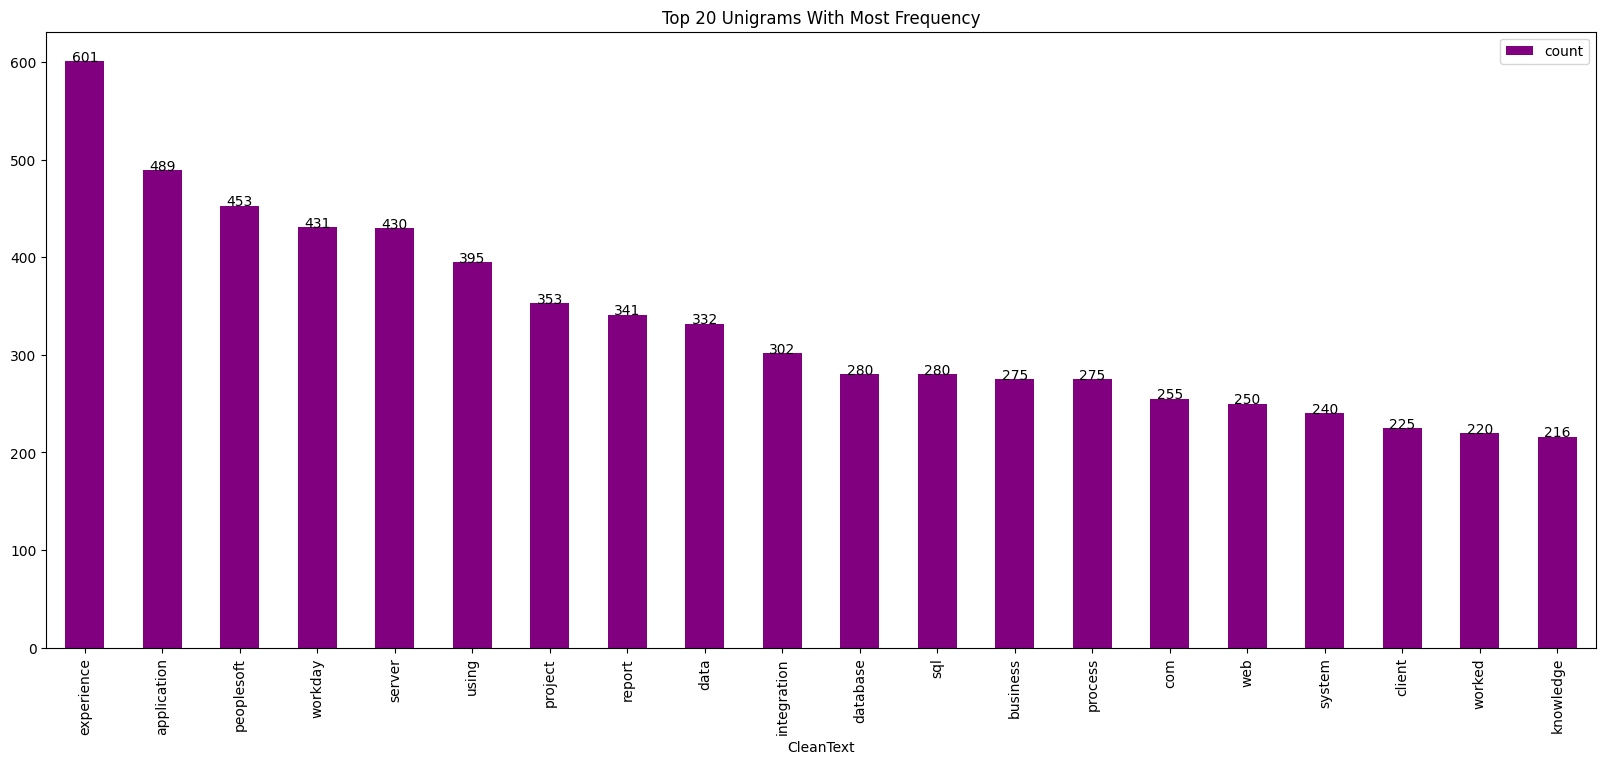

In [25]:
#get_top_n_words() returns the n-grams. n can be specified by user
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Clean Text'], 20)  #Will Take  n = 20
#for word, freq in common_words:
    #print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['CleanText' , 'count'])
##Visualizing results
#Barchart for top 10 nouns + verbs
df1[0:20].plot.bar(x='CleanText', figsize=(20,8), title='Top 20 Unigrams With Most Frequency',color ='purple')
def addlabels(x,y):
  for i in range(len(x)):
    plt.text(i,y[i],y[i],ha = 'center')
addlabels(df1['CleanText'],df1['count'])
plt.show()

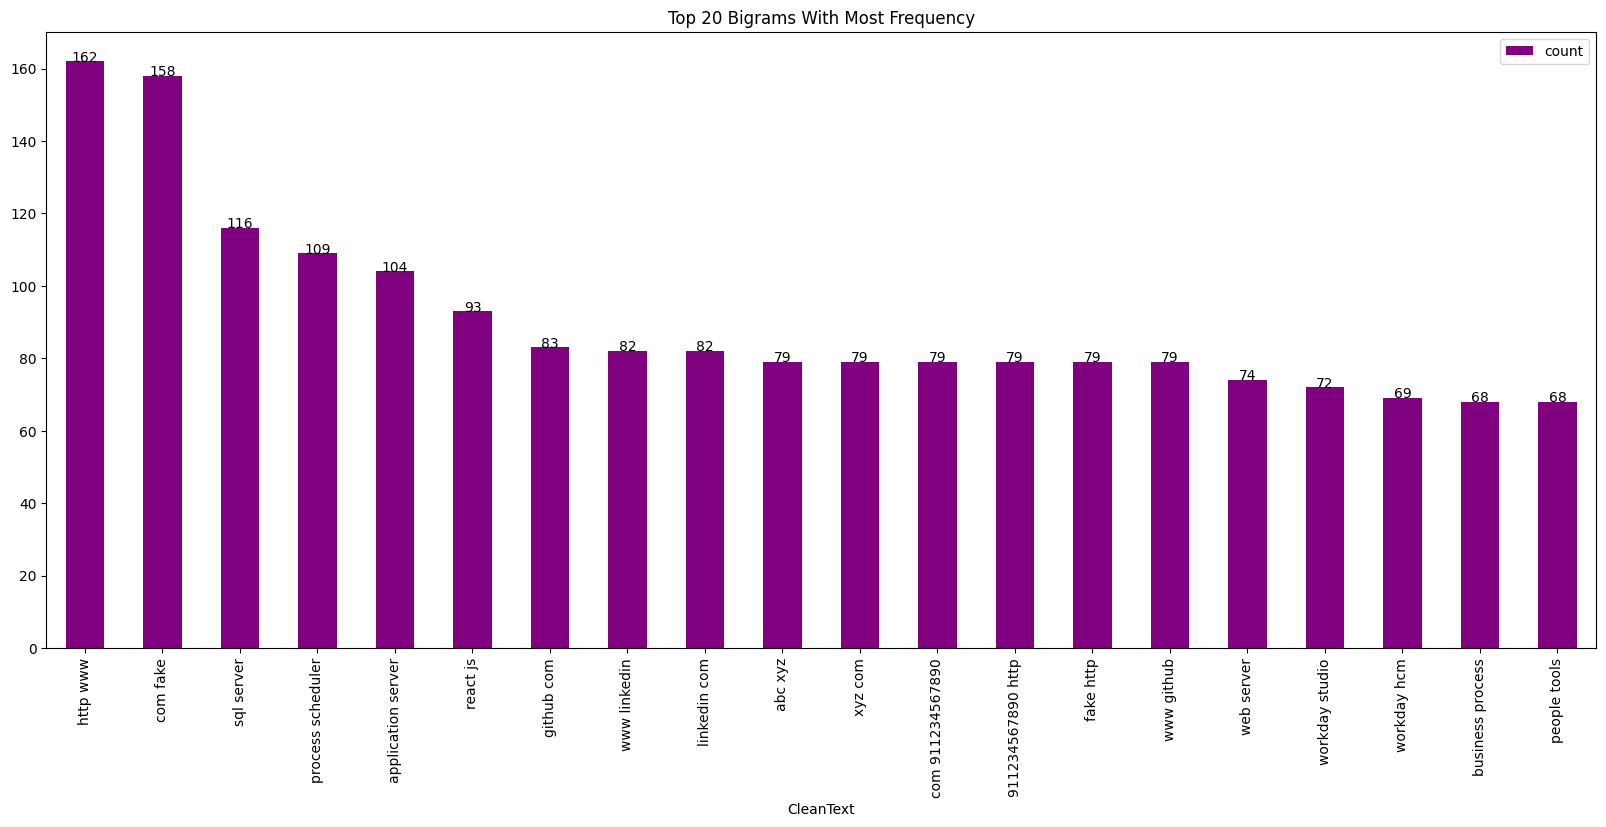

In [26]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Clean Text'], 20)
#for word, freq in common_words:
    #print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['CleanText' , 'count'])
##Visualizing results
#Barchart for top 10 nouns + verbs
df2[0:20].plot.bar(x='CleanText', figsize=(20,8), title='Top 20 Bigrams With Most Frequency',color ='purple')
#Adding Labels
addlabels(df2['CleanText'],df2['count'])
plt.show()

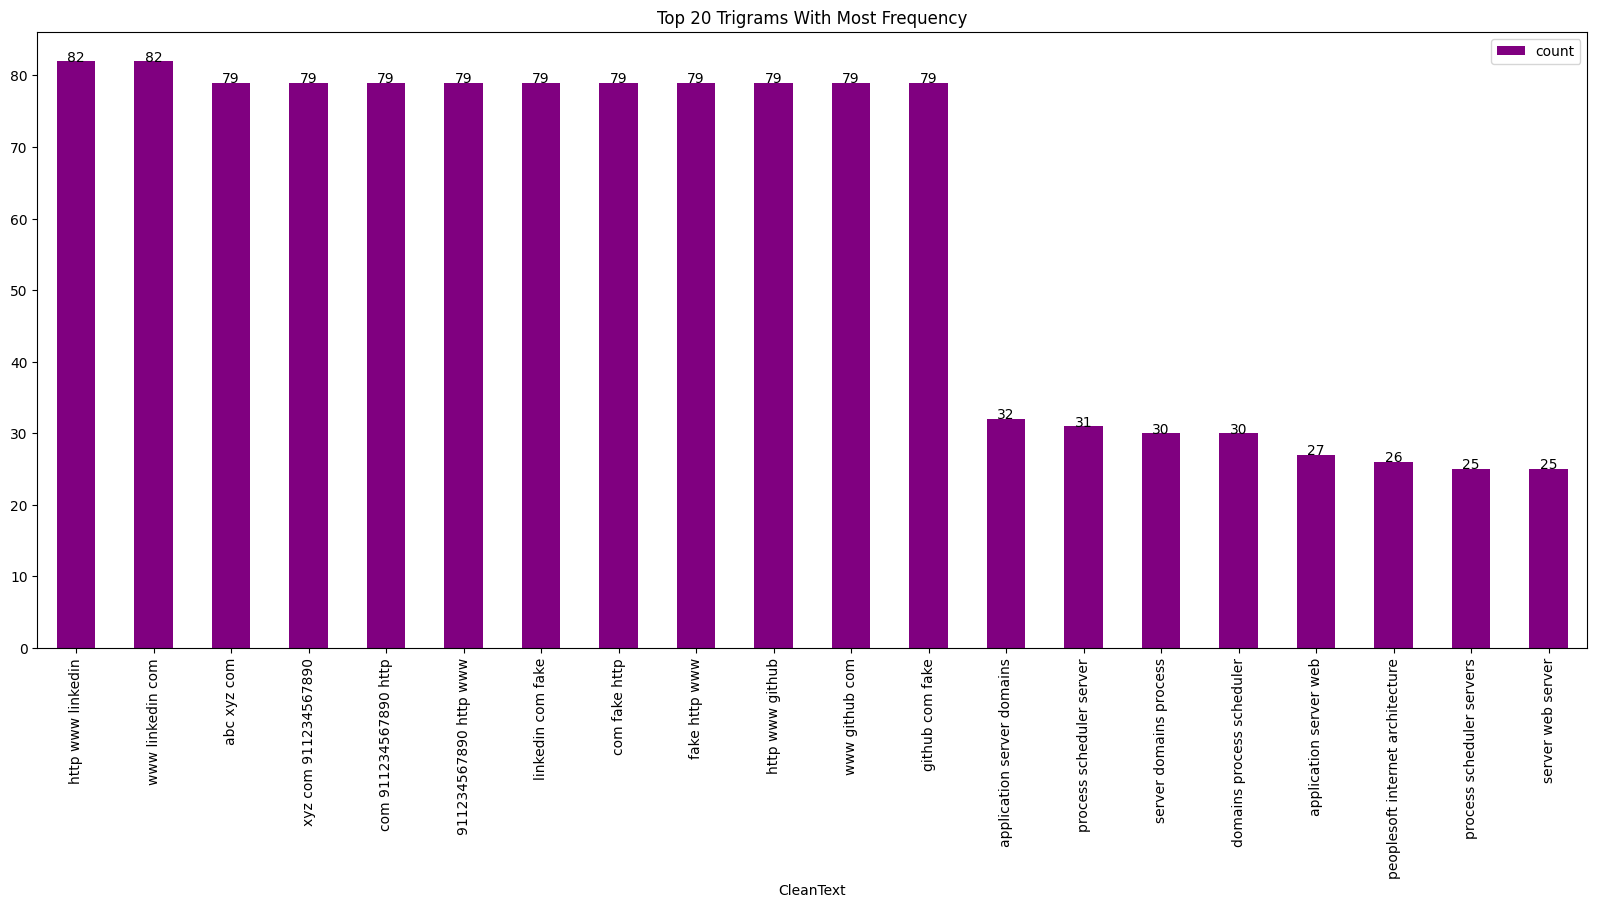

In [27]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Clean Text'], 20)
#for word, freq in common_words:
    #print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['CleanText' , 'count'])
##Visualizing results
#Barchart for top 10 nouns + verbs
df3[0:20].plot.bar(x='CleanText', figsize=(20,8), title='Top 20 Trigrams With Most Frequency',color ='purple')
#Adding Labels
addlabels(df3['CleanText'],df3['count'])
plt.show()

In [28]:
#From nltk downloading pos 
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/its_relative/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

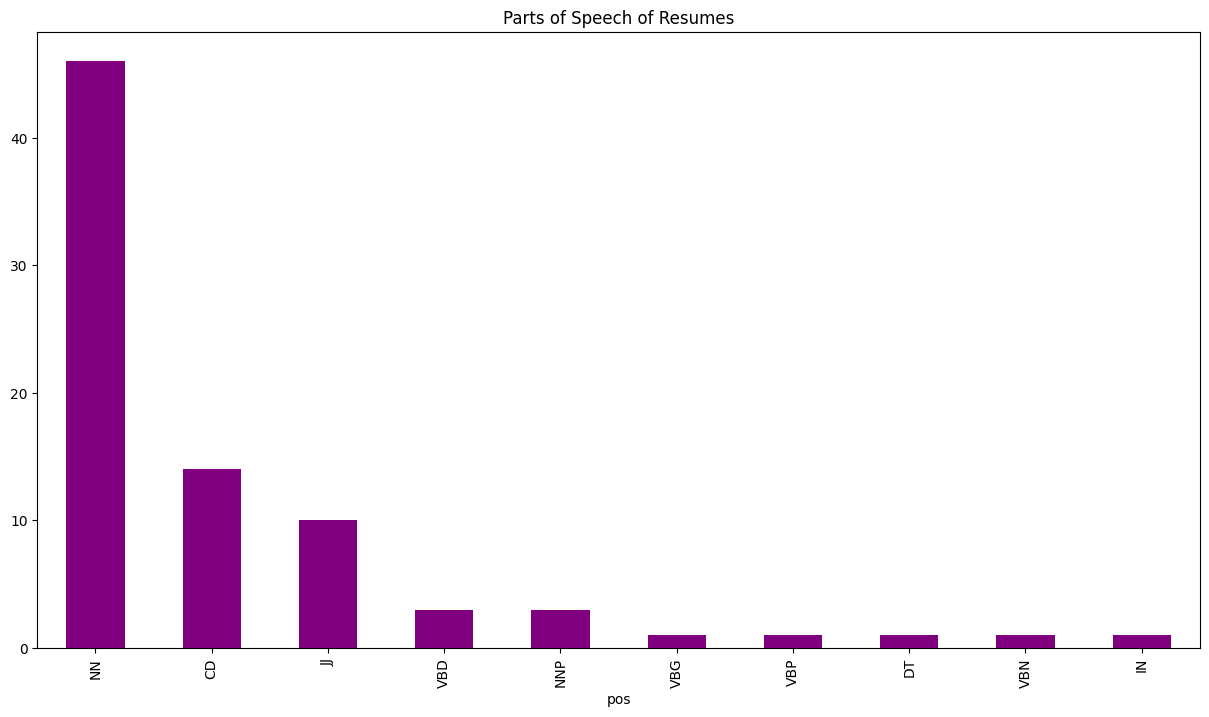

In [29]:
#Creating a Bar Graph To See Distribution of POS in Resumes
blob = TextBlob(str(df['Clean Text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
#Getting POS with greater then 20 Frequency
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot.bar(x='pos', figsize=(15,8), title='Parts of Speech of Resumes',color = 'purple')
plt.show()

In [30]:
df.to_csv('Resume_df.csv')